In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\santalucia bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_santalucia.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.28,-1.84,-1.28,...,-1.28,-1.84,-2.24,-1.44,-1.00,-0.58,-1.30,-1.84,-1.30,1
1,-1.28,-1.28,-1.84,-1.45,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,...,-1.30,-1.30,-1.00,-1.45,-1.45,-1.45,-1.45,-1.00,-0.88,1
2,-0.58,-0.88,-1.00,-1.44,-1.44,-1.44,-1.30,-1.00,-1.00,-1.30,...,-2.24,-1.84,-1.30,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44,1
3,-1.30,-2.27,-2.24,-1.84,-1.30,-1.00,-0.88,-1.00,-1.00,-0.58,...,-1.28,-1.45,-0.88,-1.44,-1.84,-1.30,-1.30,-2.27,-1.84,1
4,-0.58,-1.00,-0.88,-1.00,-1.28,-1.28,-1.00,-0.58,-1.45,-1.45,...,-2.24,-1.30,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-1.00,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-1.30,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-1.44,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.24,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-1.30,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-1.44,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.24,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45
14665,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-0.88,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45
14666,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-1.00,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44
14667,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.58,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44,0
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24,0
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30,0
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00,0
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45,0
14665,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45,0
14666,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44,0
14667,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-1.436847
1,-79,-1.439302
2,-78,-1.446063
3,-77,-1.447048
4,-76,-1.441595
...,...,...
94,14,-1.407184
95,15,-1.417233
96,16,-1.412376
97,17,-1.413293


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-1.497292,150
1,-79,-1.479691,151
2,-78,-1.484533,152
3,-77,-1.506481,153
4,-76,-1.481634,154
...,...,...,...
94,14,-1.489642,244
95,15,-1.492439,245
96,16,-1.509333,246
97,17,-1.491107,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


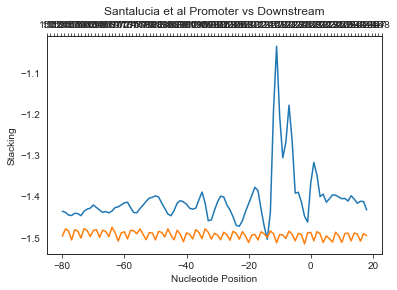

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Santalucia et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.28,-1.84,-1.28,...,-1.28,-1.84,-2.24,-1.44,-1.00,-0.58,-1.30,-1.84,-1.30,1
1,-1.28,-1.28,-1.84,-1.45,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,...,-1.30,-1.30,-1.00,-1.45,-1.45,-1.45,-1.45,-1.00,-0.88,1
2,-0.58,-0.88,-1.00,-1.44,-1.44,-1.44,-1.30,-1.00,-1.00,-1.30,...,-2.24,-1.84,-1.30,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44,1
3,-1.30,-2.27,-2.24,-1.84,-1.30,-1.00,-0.88,-1.00,-1.00,-0.58,...,-1.28,-1.45,-0.88,-1.44,-1.84,-1.30,-1.30,-2.27,-1.84,1
4,-0.58,-1.00,-0.88,-1.00,-1.28,-1.28,-1.00,-0.58,-1.45,-1.45,...,-2.24,-1.30,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45,0
29334,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45,0
29335,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44,0
29336,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
X.shape

(29338, 99)

## Model Training

In [28]:
kfold = KFold(n_splits=10, shuffle=True)
clf = XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                    max_depth=None, min_child_weight=5, n_estimators=300, 
                    subsample=1.0, n_jobs=-1, random_state=101)
fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.8868438991138378, Precision: 0.9020172910662824, Recall: 0.8646408839779005, F1 Score: 0.8829337094499294, MCC: 0.7741785402214554, Specificity: 0.9084791386271871
Fold 2: Accuracy: 0.8810497614178596, Precision: 0.8981741573033708, Recall: 0.8624409979770735, F1 Score: 0.8799449604403164, MCC: 0.7627923154657876, Specificity: 0.9000689179875948
Fold 3: Accuracy: 0.8960463531015678, Precision: 0.8975609756097561, Recall: 0.8907330567081605, F1 Score: 0.8941339812565082, MCC: 0.7920500463971559, Specificity: 0.9012096774193549
Fold 4: Accuracy: 0.8715064758009543, Precision: 0.8970051132213295, Recall: 0.8387978142076503, F1 Score: 0.8669255206494881, MCC: 0.7445410607355387, Specificity: 0.9040816326530612
Fold 5: Accuracy: 0.8701431492842536, Precision: 0.8963503649635036, Recall: 0.8370824812542604, F1 Score: 0.8657032076136765, MCC: 0.7419099016985272, Specificity: 0.9032038173142468
Fold 6: Accuracy: 0.89093387866394, Precision: 0.9169701383831027, Recall: 0.859

In [29]:
accuracy_list

[0.8868438991138378,
 0.8810497614178596,
 0.8960463531015678,
 0.8715064758009543,
 0.8701431492842536,
 0.89093387866394,
 0.8827539195637355,
 0.8769597818677574,
 0.874872144561882,
 0.877599727241732]

In [30]:
precision_list

[0.9020172910662824,
 0.8981741573033708,
 0.8975609756097561,
 0.8970051132213295,
 0.8963503649635036,
 0.9169701383831027,
 0.8970901348474095,
 0.9022286125089863,
 0.8851063829787233,
 0.907209136331192]

In [31]:
recall_list

[0.8646408839779005,
 0.8624409979770735,
 0.8907330567081605,
 0.8387978142076503,
 0.8370824812542604,
 0.8593856655290102,
 0.8639781271360218,
 0.847972972972973,
 0.8589125946317963,
 0.8473333333333334]

In [32]:
specificity_list

[0.9084791386271871,
 0.9000689179875948,
 0.9012096774193549,
 0.9040816326530612,
 0.9032038173142468,
 0.9223961878829136,
 0.9014276002719238,
 0.90646492434663,
 0.8905405405405405,
 0.9092812281926029]

In [33]:
f1_score_list 

[0.8829337094499294,
 0.8799449604403164,
 0.8941339812565082,
 0.8669255206494881,
 0.8657032076136765,
 0.8872445384073291,
 0.8802228412256269,
 0.8742598397770812,
 0.8718127837932238,
 0.8762495691140987]

In [34]:
mcc_list

[0.7741785402214554,
 0.7627923154657876,
 0.7920500463971559,
 0.7445410607355387,
 0.7419099016985272,
 0.7833909958374752,
 0.7660017973895848,
 0.7554226964161878,
 0.7499781962911155,
 0.7571727396416222]

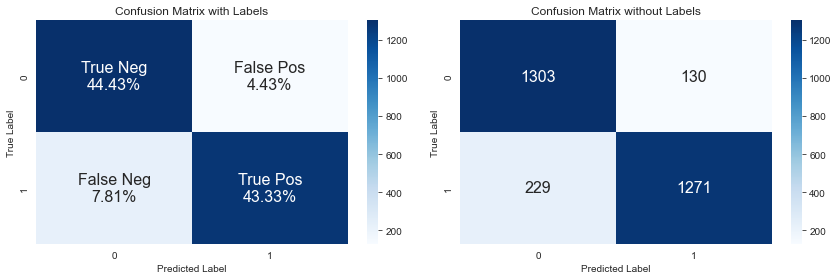

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [45]:
import pickle

# Save the trained model to a file in pickle format
model_filename = 'SLD_model.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print("Model saved successfully.")


Model saved successfully.


In [36]:
print(mean(accuracy_list))

0.880870909061752


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


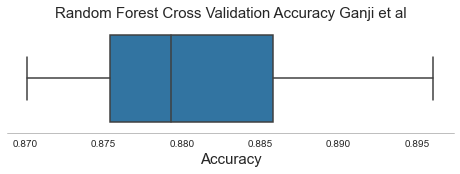

In [37]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [38]:
clf.feature_importances_

array([0.00478234, 0.0061623 , 0.00647988, 0.00521638, 0.00588822,
       0.00551849, 0.00626528, 0.00585887, 0.0055328 , 0.0048723 ,
       0.00520852, 0.00521932, 0.00531952, 0.00523993, 0.00518791,
       0.00569444, 0.0058099 , 0.00551993, 0.00595461, 0.00565559,
       0.00547672, 0.00579875, 0.00631243, 0.00504943, 0.00520686,
       0.00573004, 0.00540068, 0.00482886, 0.00640113, 0.00572356,
       0.00583653, 0.00640901, 0.00498444, 0.00557254, 0.00553643,
       0.00499357, 0.00586355, 0.0054496 , 0.00587521, 0.00624476,
       0.0059884 , 0.00618185, 0.00496171, 0.00497604, 0.00578734,
       0.00802455, 0.00544692, 0.00668368, 0.00594156, 0.0057733 ,
       0.00542515, 0.00687395, 0.00597766, 0.00638577, 0.00785044,
       0.00814259, 0.00897363, 0.00719244, 0.00906826, 0.00721779,
       0.00814987, 0.00729014, 0.00884636, 0.00757294, 0.00581355,
       0.00788047, 0.01192949, 0.01921609, 0.06813702, 0.1443498 ,
       0.03701039, 0.01665664, 0.02014231, 0.05149695, 0.02753

In [39]:
clf.feature_importances_.shape

(99,)

In [40]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

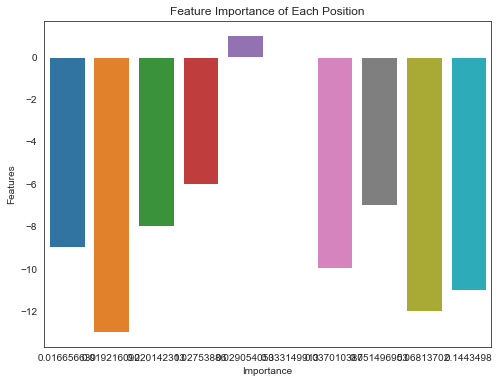

In [41]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [42]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.004782,-80
1,1,0.006162,-79
2,2,0.006480,-78
3,3,0.005216,-77
4,4,0.005888,-76
...,...,...,...
94,94,0.004482,14
95,95,0.005489,15
96,96,0.005309,16
97,97,0.005140,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

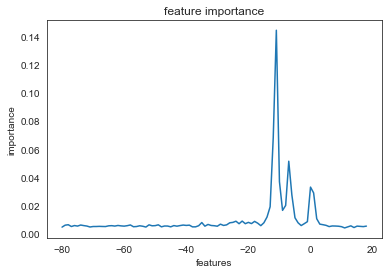

In [43]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [44]:
avg_mcc = sum(mcc_list) / len(mcc_list)
avg_specificity = sum(specificity_list) / len(specificity_list)
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1_score = sum(f1_score_list) / len(f1_score_list)

print("Average MCC: {}, Average Specificity: {}, Average Accuracy: {}, Average Precision: {}, Average Recall: {}, Average F1 Score: {}".format(
    avg_mcc, avg_specificity, avg_accuracy, avg_precision, avg_recall, avg_f1_score))

Average MCC: 0.762743829009445, Average Specificity: 0.9047153665236054, Average Accuracy: 0.8808709090617521, Average Precision: 0.8999712307213656, Average Recall: 0.857127792772818, Average F1 Score: 0.8779430951727278


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


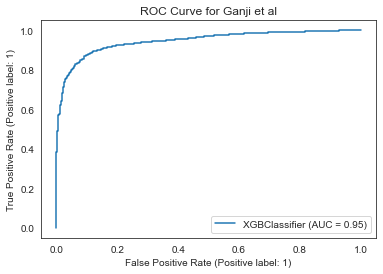

In [46]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


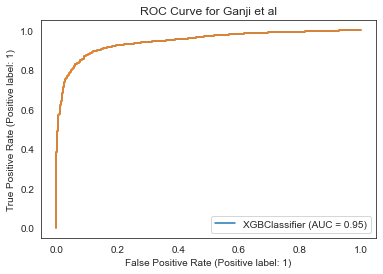

In [47]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_santalucia_xg_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [46]:
!pip install shap

In [47]:
import shap


In [48]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [49]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[455, 2881, 2711, 3984, 3391, 9878, 2268, 2037, 1299, 3117, 896, 5511, 694, 8918, 4330, 4287, 648, 203, 4515, 9839, 6224, 7514, 6831, 6088, 1626, 54, 9004, 7865, 4042, 7429, 8186, 2286, 8742, 4324, 3807, 6898, 5694, 3101, 603, 104]


In [50]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [51]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-0.88,-1.28,-1.84,-1.45,-1.45,-1.45,-1.30,-2.27,-1.28,-1.28,...,-2.27,-2.24,-2.27,-1.84,-2.24,-1.84,-1.30,-1.45,-2.24,-2.27
6345,-1.44,-1.44,-1.44,-1.44,-1.84,-2.27,-2.24,-1.30,-0.88,-1.28,...,-1.45,-1.00,-1.30,-1.30,-1.30,-1.44,-1.44,-1.84,-1.30,-1.30
8807,-1.44,-1.84,-2.27,-2.24,-2.27,-1.28,-1.44,-1.84,-1.30,-1.30,...,-1.00,-1.44,-1.84,-2.27,-2.24,-1.30,-0.88,-1.00,-1.00,-1.28
5017,-1.45,-1.45,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44,-1.44,-0.58,...,-1.45,-1.84,-2.24,-1.30,-1.45,-1.84,-2.24,-1.44,-1.00,-1.28
2395,-1.45,-1.30,-1.30,-1.30,-1.44,-1.28,-1.45,-1.30,-1.84,-1.84,...,-0.88,-1.00,-0.58,-0.88,-1.00,-1.28,-1.28,-1.00,-1.00,-1.00
4771,-1.30,-1.44,-1.44,-1.30,-1.45,-1.28,-1.00,-1.44,-1.84,-2.27,...,-1.28,-1.84,-1.84,-1.45,-1.45,-2.24,-1.30,-0.88,-1.44,-2.27
6378,-1.30,-1.30,-1.84,-2.27,-1.45,-1.45,-1.45,-1.00,-0.88,-0.58,...,-1.84,-2.27,-1.45,-1.00,-1.45,-1.28,-0.58,-1.00,-0.88,-1.44
6038,-1.28,-0.58,-0.88,-1.28,-1.28,-0.58,-1.45,-1.28,-0.58,-0.88,...,-0.58,-0.88,-1.00,-1.28,-1.28,-1.28,-2.24,-1.30,-0.88,-0.58
2073,-2.24,-1.44,-0.58,-1.30,-2.27,-1.45,-1.30,-2.27,-1.45,-1.45,...,-0.88,-1.28,-1.45,-1.00,-0.88,-1.00,-1.00,-0.58,-0.88,-1.28
8765,-1.45,-1.00,-0.88,-0.58,-1.45,-1.84,-1.45,-0.88,-1.28,-1.84,...,-0.88,-1.44,-2.27,-1.84,-1.28,-1.00,-1.28,-1.28,-0.58,-0.88


In [56]:
X_promoters= promoter.drop(columns=['label']) #X.loc[:14668]
X_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-1.28,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.28,-1.84,-1.28,...,-0.88,-1.28,-1.84,-2.24,-1.44,-1.00,-0.58,-1.30,-1.84,-1.30
1,-1.28,-1.28,-1.84,-1.45,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,...,-1.30,-1.30,-1.30,-1.00,-1.45,-1.45,-1.45,-1.45,-1.00,-0.88
2,-0.58,-0.88,-1.00,-1.44,-1.44,-1.44,-1.30,-1.00,-1.00,-1.30,...,-1.45,-2.24,-1.84,-1.30,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44
3,-1.30,-2.27,-2.24,-1.84,-1.30,-1.00,-0.88,-1.00,-1.00,-0.58,...,-1.00,-1.28,-1.45,-0.88,-1.44,-1.84,-1.30,-1.30,-2.27,-1.84
4,-0.58,-1.00,-0.88,-1.00,-1.28,-1.28,-1.00,-0.58,-1.45,-1.45,...,-1.45,-2.24,-1.30,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-1.44,-1.84,-1.84,-1.30,-0.88,-1.00,-1.00,-1.00,-1.44,-2.27,...,-1.44,-2.27,-1.45,-0.88,-1.00,-1.00,-1.44,-1.44,-1.28,-1.45
14665,-1.30,-1.84,-1.44,-1.28,-1.45,-1.00,-1.00,-1.00,-1.45,-1.45,...,-2.27,-1.28,-0.58,-0.88,-1.44,-2.27,-1.28,-1.00,-0.58,-1.30
14666,-1.84,-1.30,-0.88,-0.58,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-0.58,-0.88,-1.44,-1.84,-2.27,-1.45,-1.00
14667,-2.27,-1.45,-1.30,-1.30,-1.30,-1.44,-1.00,-1.28,-1.45,-1.45,...,-1.45,-1.00,-0.88,-0.58,-1.00,-0.88,-0.58,-1.00,-0.88,-1.00


In [57]:
explainer = shap.TreeExplainer(clf, X_promoters)
shap_values = explainer.shap_values(X_promoters)

100%|===================| 14630/14669 [02:45<00:00]        

In [58]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

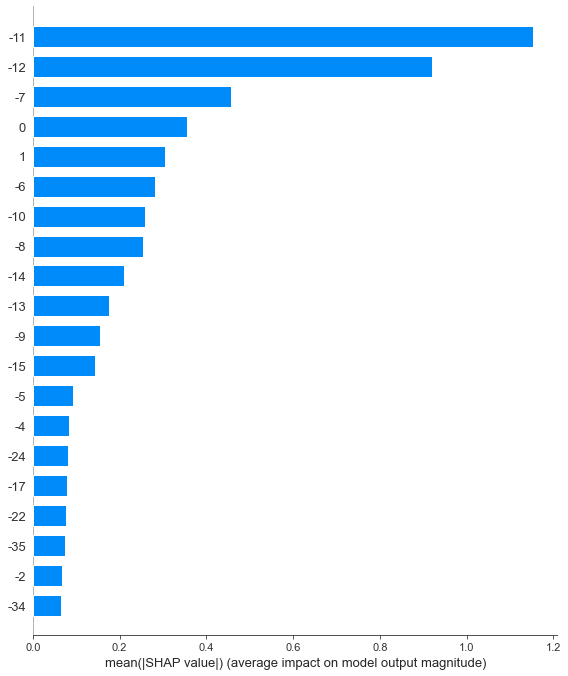

In [59]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

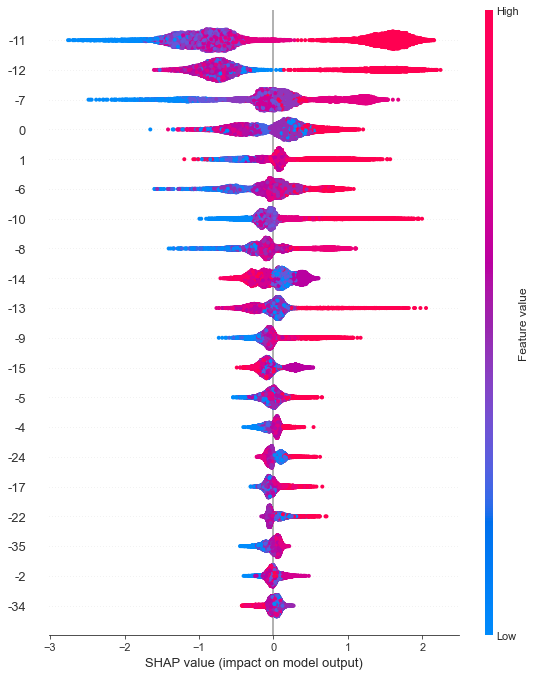

In [61]:
shap.summary_plot(shap_values, X_promoters, feature_names = X_promoters.columns)

IndexError: index 2495 is out of bounds for axis 0 with size 40

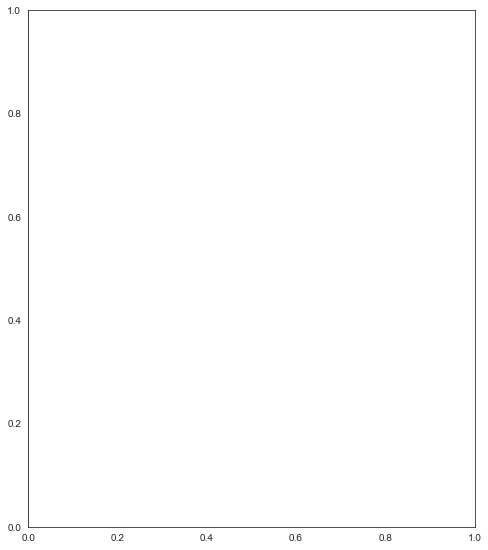

In [60]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [48]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\santalucia\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\santalucia\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\santalucia\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\santalucia\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [49]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Santalucia Test Organism')]

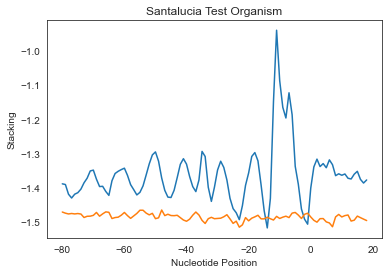

In [50]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Santalucia Test Organism')

## Test Labels

In [51]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [52]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [53]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9186147186147187


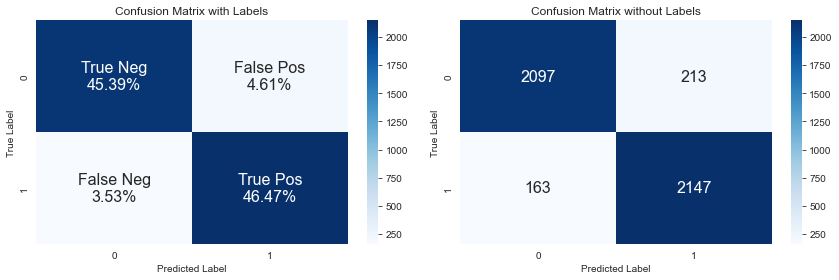

In [54]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [56]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=101)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.922077922077922, Precision: 0.9333333333333333, Recall: 0.9090909090909091, F1 Score: 0.9210526315789475, MCC: 0.8444407432001202, Specificity: 0.935064935064935
Fold 2/10
 Accuracy: 0.9134199134199135, Precision: 0.8930041152263375, Recall: 0.9393939393939394, F1 Score: 0.9156118143459916, MCC: 0.8279577449800347, Specificity: 0.8874458874458875
Fold 3/10
 Accuracy: 0.9199134199134199, Precision: 0.8943089430894309, Recall: 0.9523809523809523, F1 Score: 0.9224318658280922, MCC: 0.8416030501774883, Specificity: 0.8874458874458875
Fold 4/10
 Accuracy: 0.9155844155844156, Precision: 0.9102564102564102, Recall: 0.922077922077922, F1 Score: 0.9161290322580644, MCC: 0.8312389335458098, Specificity: 0.9090909090909091
Fold 5/10
 Accuracy: 0.9047619047619048, Precision: 0.8785425101214575, Recall: 0.9393939393939394, F1 Score: 0.9079497907949791, MCC: 0.8114726744182816, Specificity: 0.8701298701298701
Fold 6/10
 Accuracy: 0.9090909090909091, Precision: 0.91266375545851

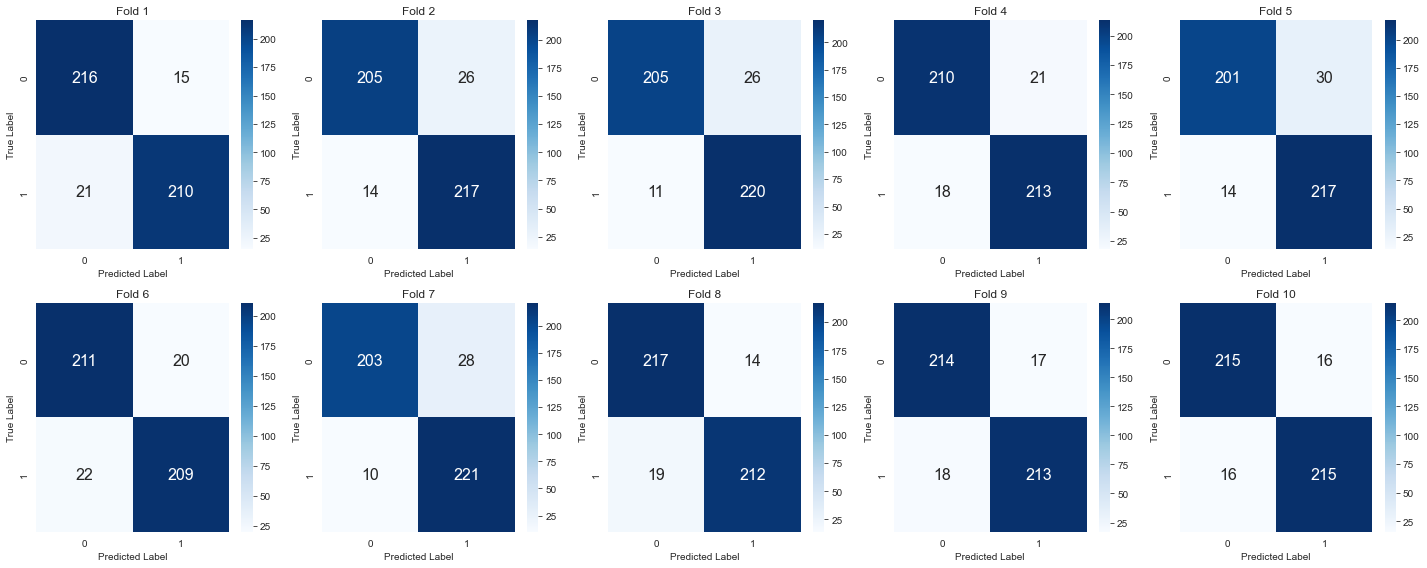

In [57]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [58]:
test_accuracy

[0.922077922077922,
 0.9134199134199135,
 0.9199134199134199,
 0.9155844155844156,
 0.9047619047619048,
 0.9090909090909091,
 0.9177489177489178,
 0.9285714285714286,
 0.9242424242424242,
 0.9307359307359307]

In [59]:
test_precision

[0.9333333333333333,
 0.8930041152263375,
 0.8943089430894309,
 0.9102564102564102,
 0.8785425101214575,
 0.9126637554585153,
 0.8875502008032129,
 0.9380530973451328,
 0.9260869565217391,
 0.9307359307359307]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [60]:
test_recall

[0.9090909090909091,
 0.9393939393939394,
 0.9523809523809523,
 0.922077922077922,
 0.9393939393939394,
 0.9047619047619048,
 0.9567099567099567,
 0.9177489177489178,
 0.922077922077922,
 0.9307359307359307]

In [61]:
test_specificity

[0.935064935064935,
 0.8874458874458875,
 0.8874458874458875,
 0.9090909090909091,
 0.8701298701298701,
 0.9134199134199135,
 0.8787878787878788,
 0.9393939393939394,
 0.9264069264069265,
 0.9307359307359307]

In [62]:
test_f1_score

[0.9210526315789475,
 0.9156118143459916,
 0.9224318658280922,
 0.9161290322580644,
 0.9079497907949791,
 0.9086956521739129,
 0.9208333333333334,
 0.9277899343544858,
 0.9240780911062906,
 0.9307359307359307]

In [63]:
test_mcc

[0.8444407432001202,
 0.8279577449800347,
 0.8416030501774883,
 0.8312389335458098,
 0.8114726744182816,
 0.8182124858162299,
 0.8380459540943429,
 0.857343716421597,
 0.8484927990177686,
 0.8614718614718615]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [64]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense santalucia promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-0.58,-1.30,-1.84,-1.30,-0.88,-1.00,-1.28,-1.28,-1.00,-1.00,...,-1.84,-1.45,-1.00,-1.00,-1.00,-1.30,-1.30,-1.00,-1.30,1
1,-1.30,-1.00,-1.30,-2.27,-2.24,-1.30,-0.88,-0.58,-1.00,-1.30,...,-1.00,-1.30,-2.27,-1.45,-0.88,-1.28,-1.84,-1.45,-1.00,1
2,-1.00,-1.28,-1.45,-0.88,-1.44,-1.30,-0.88,-0.58,-0.88,-0.58,...,-1.30,-2.27,-1.28,-1.28,-2.24,-1.44,-0.58,-1.00,-1.00,1
3,-1.28,-1.28,-0.58,-1.30,-1.30,-1.00,-1.30,-2.27,-1.28,-1.44,...,-1.44,-1.84,-1.30,-1.30,-1.30,-1.00,-1.00,-0.88,-1.44,1
4,-1.30,-1.84,-1.44,-0.58,-1.00,-1.00,-0.88,-0.58,-1.45,-1.84,...,-1.45,-1.30,-1.84,-2.27,-1.84,-1.84,-1.28,-1.28,-1.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-2.24,-1.44,-1.00,-1.00,-1.28,-1.84,-1.84,-1.84,-1.28,-1.00,...,-1.00,-1.28,-1.45,-0.88,-1.28,-2.24,-1.44,-1.28,-1.84,0
12164,-1.00,-1.28,-1.28,-1.00,-1.28,-2.24,-1.84,-1.44,-1.44,-2.27,...,-1.45,-1.84,-2.24,-1.84,-1.30,-1.30,-2.27,-2.24,-1.30,0
12165,-1.28,-1.44,-1.30,-0.88,-1.44,-1.84,-1.84,-1.84,-1.30,-1.30,...,-1.45,-1.28,-0.58,-1.00,-1.45,-1.45,-1.30,-2.27,-1.84,0
12166,-1.00,-1.30,-1.30,-0.88,-1.00,-1.44,-2.27,-2.24,-1.84,-1.84,...,-1.84,-1.84,-1.30,-1.45,-1.28,-1.00,-1.00,-0.58,-1.30,0


In [65]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [66]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8225143796220213, Precision: 0.8393782383419689, Recall: 0.7980295566502463, F1 Score: 0.8181818181818181, MCC: 0.6458282032820479, Specificity: 0.9307359307359307
Fold 2/10
 Accuracy: 0.8307313064913723, Precision: 0.8255250403877221, Recall: 0.8390804597701149, F1 Score: 0.8322475570032574, MCC: 0.661547153973784, Specificity: 0.8470394736842105
Fold 3/10
 Accuracy: 0.8373048479868529, Precision: 0.8512820512820513, Recall: 0.8177339901477833, F1 Score: 0.8341708542713567, MCC: 0.675145324545632, Specificity: 0.8223684210526315
Fold 4/10
 Accuracy: 0.8373048479868529, Precision: 0.8407960199004975, Recall: 0.8325123152709359, F1 Score: 0.8366336633663367, MCC: 0.6746449093602177, Specificity: 0.8569078947368421
Fold 5/10
 Accuracy: 0.8397699260476582, Precision: 0.8401976935749588, Recall: 0.8388157894736842, F1 Score: 0.8395061728395061, MCC: 0.6795401206168391, Specificity: 0.8421052631578947
Fold 6/10
 Accuracy: 0.8258011503697618, Precision: 0.809375, Recal

In [67]:
antisense_accuracy

[0.8225143796220213,
 0.8307313064913723,
 0.8373048479868529,
 0.8373048479868529,
 0.8397699260476582,
 0.8258011503697618,
 0.8356614626129828,
 0.8249794576828267,
 0.8133223684210527,
 0.8314144736842105]

In [68]:
antisense_precision

[0.8393782383419689,
 0.8255250403877221,
 0.8512820512820513,
 0.8407960199004975,
 0.8401976935749588,
 0.809375,
 0.8344262295081967,
 0.8170144462279294,
 0.8148760330578513,
 0.8409475465313029]

In [69]:
antisense_recall

[0.7980295566502463,
 0.8390804597701149,
 0.8177339901477833,
 0.8325123152709359,
 0.8388157894736842,
 0.8519736842105263,
 0.837171052631579,
 0.837171052631579,
 0.8108552631578947,
 0.8174342105263158]

In [70]:
antisense_specificity

[0.9307359307359307,
 0.8470394736842105,
 0.8223684210526315,
 0.8569078947368421,
 0.8421052631578947,
 0.8407224958949097,
 0.7996715927750411,
 0.8341543513957307,
 0.812807881773399,
 0.8157894736842105]

In [71]:
antisense_f1_score

[0.8181818181818181,
 0.8322475570032574,
 0.8341708542713567,
 0.8366336633663367,
 0.8395061728395061,
 0.8301282051282052,
 0.8357963875205254,
 0.8269699431356622,
 0.8128606760098929,
 0.829024186822352]

In [72]:
antisense_mcc

[0.6458282032820479,
 0.661547153973784,
 0.675145324545632,
 0.6746449093602177,
 0.6795401206168391,
 0.6525199500898173,
 0.6713272170947941,
 0.650163330826857,
 0.6266523652636117,
 0.6630881962505201]

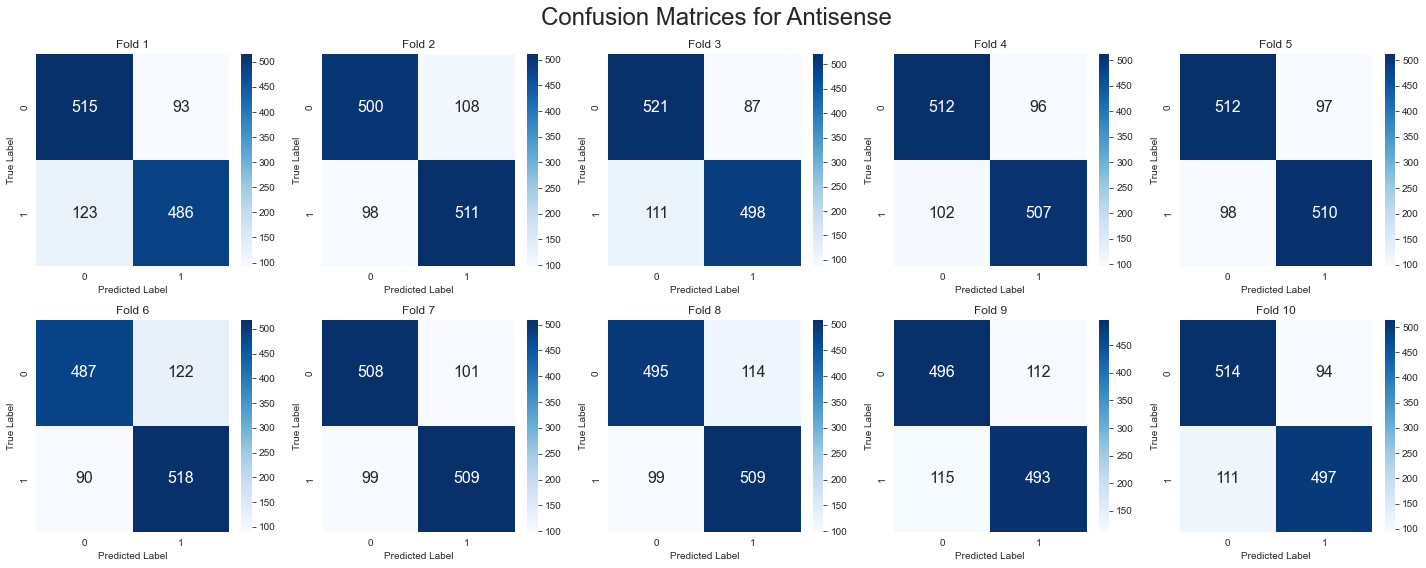

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [74]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced santalucia promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.28,-2.24,-1.44,-0.58,-1.45,-2.24,-1.84,-1.84,-1.30,...,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-0.88,-1.28,-1.45,1
1,-0.88,-1.28,-1.45,-1.00,-1.00,-0.88,-1.00,-1.00,-0.58,-1.45,...,-1.45,-1.30,-2.27,-1.28,-1.00,-0.58,-0.88,-1.44,-2.27,1
2,-1.84,-1.84,-2.27,-1.84,-1.45,-0.88,-1.44,-2.27,-1.45,-1.30,...,-1.30,-2.27,-1.45,-1.00,-0.88,-1.00,-1.44,-2.27,-1.28,1
3,-1.45,-1.45,-1.00,-1.45,-1.28,-1.44,-1.30,-0.88,-1.00,-0.58,...,-1.00,-1.00,-1.45,-2.24,-1.30,-1.00,-1.00,-0.88,-1.28,1
4,-1.28,-1.28,-1.28,-1.00,-1.00,-0.58,-1.00,-1.00,-0.88,-1.28,...,-1.45,-1.45,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-0.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-1.84,-2.27,-1.84,-1.84,-1.45,-1.45,-2.24,-1.84,-2.27,-2.24,...,-1.45,-1.00,-1.45,-1.28,-1.28,-1.84,-1.84,-2.24,-1.84,0
12126,-1.84,-2.24,-1.30,-1.45,-2.24,-2.27,-1.45,-1.00,-1.30,-2.27,...,-1.84,-2.27,-2.24,-1.30,-1.00,-1.45,-1.84,-2.24,-2.27,0
12127,-1.00,-1.30,-1.30,-1.00,-1.30,-1.30,-1.45,-1.84,-2.24,-1.30,...,-1.45,-1.45,-2.24,-2.27,-1.84,-1.45,-1.45,-1.84,-1.45,0
12128,-2.27,-1.84,-2.24,-1.30,-1.00,-1.30,-1.30,-1.45,-1.84,-1.45,...,-2.27,-2.24,-1.84,-1.30,-0.88,-1.28,-2.24,-1.84,-2.27,0


In [75]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [76]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8145094806265457, Precision: 0.8350877192982457, Recall: 0.7841845140032949, F1 Score: 0.8088360237892949, MCC: 0.6302110722218893, Specificity: 0.8453947368421053
Fold 2/10
 Accuracy: 0.8062654575432812, Precision: 0.8286219081272085, Recall: 0.7726523887973641, F1 Score: 0.7996589940323956, MCC: 0.613956554097666, Specificity: 0.8448844884488449
Fold 3/10
 Accuracy: 0.8219291014014839, Precision: 0.8472468916518651, Recall: 0.785831960461285, F1 Score: 0.8153846153846154, MCC: 0.6455801844015433, Specificity: 0.8399339933993399
Fold 4/10
 Accuracy: 0.8145094806265457, Precision: 0.8523985239852399, Recall: 0.7611202635914333, F1 Score: 0.8041775456919059, MCC: 0.6326948724367819, Specificity: 0.858085808580858
Fold 5/10
 Accuracy: 0.8037922506183017, Precision: 0.8288770053475936, Recall: 0.7660626029654036, F1 Score: 0.7962328767123287, MCC: 0.6093637520446661, Specificity: 0.8679867986798679
Fold 6/10
 Accuracy: 0.8351195383347073, Precision: 0.85489510489510

In [77]:
internal_accuracy

[0.8145094806265457,
 0.8062654575432812,
 0.8219291014014839,
 0.8145094806265457,
 0.8037922506183017,
 0.8351195383347073,
 0.8276999175597691,
 0.8202802967848309,
 0.8408903544929925,
 0.8524319868095631]

In [78]:
internal_precision

[0.8350877192982457,
 0.8286219081272085,
 0.8472468916518651,
 0.8523985239852399,
 0.8288770053475936,
 0.8548951048951049,
 0.8452173913043478,
 0.8439716312056738,
 0.8788990825688073,
 0.8792184724689165]

In [79]:
internal_recall

[0.7841845140032949,
 0.7726523887973641,
 0.785831960461285,
 0.7611202635914333,
 0.7660626029654036,
 0.806930693069307,
 0.801980198019802,
 0.7854785478547854,
 0.7904290429042904,
 0.8168316831683168]

In [80]:
internal_specificity

[0.8453947368421053,
 0.8448844884488449,
 0.8399339933993399,
 0.858085808580858,
 0.8679867986798679,
 0.8415841584158416,
 0.8632619439868204,
 0.8533772652388797,
 0.8550247116968699,
 0.8912685337726524]

In [81]:
internal_f1_score

[0.8088360237892949,
 0.7996589940323956,
 0.8153846153846154,
 0.8041775456919059,
 0.7962328767123287,
 0.8302207130730052,
 0.8230313293818798,
 0.8136752136752136,
 0.8323197219808861,
 0.8468776732249784]

In [82]:
internal_mcc

[0.6302110722218893,
 0.613956554097666,
 0.6455801844015433,
 0.6326948724367819,
 0.6093637520446661,
 0.6712793393978475,
 0.656242941932034,
 0.6420814179339175,
 0.6852293008429956,
 0.7066249340006372]

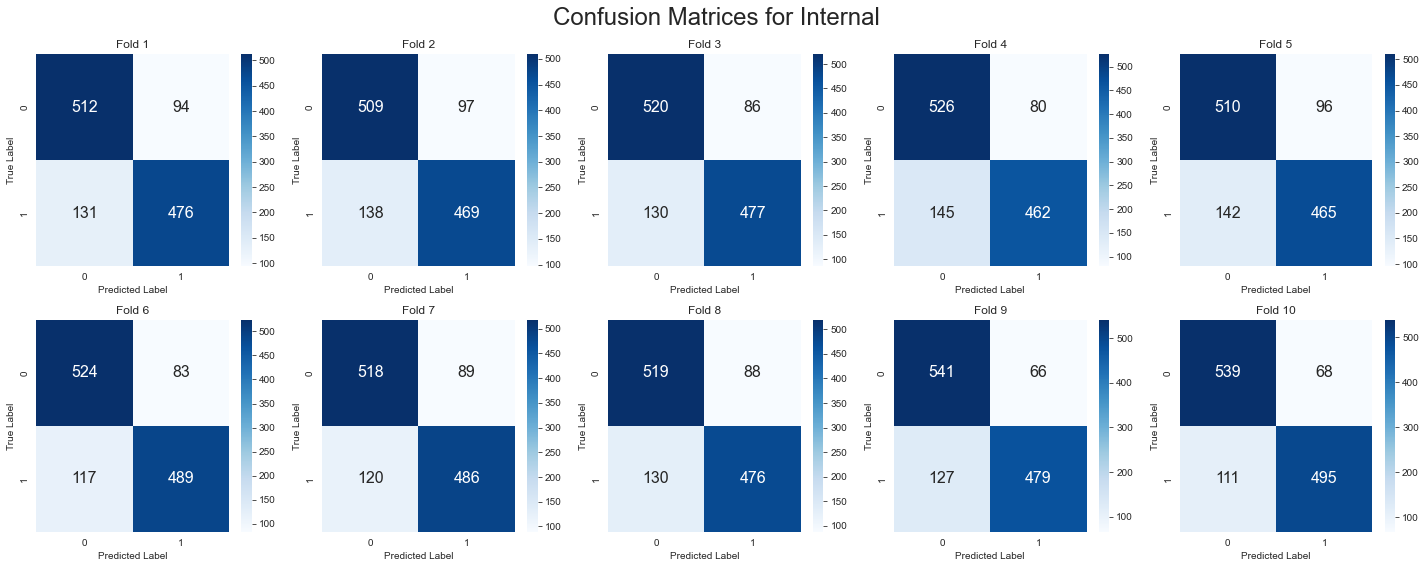

In [83]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
